In [1]:
import cv2
from matplotlib import pyplot as plt 
import math

import numpy as np

In [2]:
def angle(pt1, pt2, pt0) -> float:
    dx1 = float(pt1[0,0] - pt0[0,0])
    dy1 = float(pt1[0,1] - pt0[0,1])
    dx2 = float(pt2[0,0] - pt0[0,0])
    dy2 = float(pt2[0,1] - pt0[0,1])
    v = math.sqrt((dx1*dx1 + dy1*dy1)*(dx2*dx2 + dy2*dy2))
    return (dx1*dx2 + dy1*dy2)/v


In [4]:
# detect box
contours={}

def findSquares(bin_image, image ,cond_area = 400):
    global contours
#    contours, _ = cv2.findContours(bin_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    contours, _ = cv2.findContours(bin_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    
    contImage = image.copy()
    cv2.drawContours(contImage, contours, -1, (0, 255, 0), 1)

    contImage = cv2.cvtColor(contImage, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20,15))
    plt.imshow(contImage)

    for i, cnt in enumerate(contours):
        arclen = cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt, arclen *0.02, True)
#        cv2.polylines(image, [approx], True, (255,0,255), thickness = 1, lineType=cv2.LINE_8)
    
        area = abs(cv2.contourArea(approx))
        print(i,arclen,len(cnt),"Shape:",approx.shape[0], "area:",area)
        if approx.shape[0] >= 4  and approx.shape[0]<=6 and area > 200 and area < 10000 and cv2.isContourConvex(approx) :
            maxCosine = 0
            
            for j in range(2,5):
                cosine = abs(angle(approx[j%4], approx[j-2], approx[j-1]))
                maxCsine = max(maxCosine, cosine)
        
            if maxCosine < 0.3:
                rect = approx.reshape(-1,2)
                cv2.polylines(image, [approx], True, (0,0,255), thickness = 1, lineType=cv2.LINE_8)
    return image

def doit():
    image = cv2.imread('hand_edit.png', cv2.IMREAD_COLOR)
#    kernel = np.ones((5,5),np.uint8)
#    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    if image is None:
        exit(1)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#    rbw = cv2.cvtColor(bw, cv2.COLOR_GRAY2RGB)
#    plt.figure(figsize=(20,15))
#    plt.imshow(rbw)
    
    rimage = findSquares(bw, image)
#    cv2.imshow('Square Detection', rimage)
#    c = cv2.waitKey()
#    cv2.destroyAllWindows()
    gg = cv2.cvtColor(rimage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,15))
    plt.imshow(gg)
    

In [59]:

def minmax(ct):
    xmax = ymax = 0
    xmin = ymin = 99999
    for i, v in enumerate(ct):
        x = v[0][0]
        y = v[0][1]
        if x<xmin:
            xmin = x
        if x>xmax:
            xmax = x
        if y<ymin:
            ymin = y
        if y>ymax:
            ymax = y
    return [xmin,ymin, xmax, ymax]

contList = []

def findSquares2(bin_image, image ):
    contours, _ = cv2.findContours(bin_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
       
    contImage = image.copy()
    cv2.drawContours(contImage, contours, -1, (0, 255, 0), 1)

    contImage = cv2.cvtColor(contImage, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(20,15))
    plt.imshow(contImage)

    for i, cnt in enumerate(contours):
        arclen = cv2.arcLength(cnt,True)
        approx = cv2.approxPolyDP(cnt, arclen *0.02, True)
#        cv2.polylines(image, [approx], True, (255,0,255), thickness = 1, lineType=cv2.LINE_8)
    
        area = abs(cv2.contourArea(approx))
        if approx.shape[0] >= 4  and approx.shape[0]<7 and area > 200 and area < 10000 :
            maxCosine = 0            
            for j in range(2,5):
                cosine = abs(angle(approx[j%4], approx[j-2], approx[j-1]))
                maxCsine = max(maxCosine, cosine)
        
            if maxCosine < 0.001:
                if not cv2.isContourConvex(approx):
                    print("NotConvex ",i,arclen,len(cnt),"Shape:",approx.shape[0], "area:",area)
                    if len(cnt)>20:
                        continue
                mm = minmax(cnt)
                cv2.rectangle(image, (mm[0],mm[1]), (mm[2],mm[3]) , (0,0,255), thickness = 1)
                contList.append(mm)
            else:
                print("Not rect")
        else:
            print(i,arclen,len(cnt),"Shape:",approx.shape[0], "area:",area)
            
        
                
    return image

def doit2():
    image = cv2.imread('hand_edit.png', cv2.IMREAD_COLOR)
#    kernel = np.ones((5,5),np.uint8)
#    opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    if image is None:
        exit(1)
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, bw = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#    rbw = cv2.cvtColor(bw, cv2.COLOR_GRAY2RGB)
#    plt.figure(figsize=(20,15))
#    plt.imshow(rbw)
    
    rimage = findSquares2(bw, image)
#    cv2.imshow('Square Detection', rimage)
#    c = cv2.waitKey()
#    cv2.destroyAllWindows()
    gg = cv2.cvtColor(rimage, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(20,15))
    plt.imshow(gg)

35 55.65685415267944 6 Shape: 2 area: 0.0
36 24.485281229019165 10 Shape: 6 area: 25.0
37 7.656854152679443 6 Shape: 6 area: 4.0
38 11.071067690849304 8 Shape: 8 area: 7.5
39 35.65685415267944 6 Shape: 6 area: 32.0
40 64.72792184352875 16 Shape: 7 area: 54.0
41 21.656854152679443 6 Shape: 6 area: 18.0
42 90.14213538169861 21 Shape: 10 area: 66.5
43 45.65685415267944 8 Shape: 4 area: 122.0
44 45.65685415267944 8 Shape: 4 area: 122.0
45 45.65685415267944 8 Shape: 4 area: 122.0
46 45.65685415267944 8 Shape: 4 area: 122.0
47 82.48528122901917 11 Shape: 7 area: 297.0
48 9.656854152679443 6 Shape: 6 area: 6.0
49 47.65685415267944 6 Shape: 6 area: 44.0
50 51.65685415267944 8 Shape: 4 area: 137.0
64 45.65685415267944 8 Shape: 4 area: 122.0
65 45.071067690849304 8 Shape: 7 area: 136.0
70 45.65685415267944 8 Shape: 4 area: 122.0
80 45.65685415267944 8 Shape: 4 area: 122.0
85 45.65685415267944 8 Shape: 4 area: 122.0
93 7.656854152679443 6 Shape: 6 area: 4.0
94 9.071067690849304 6 Shape: 6 area: 5

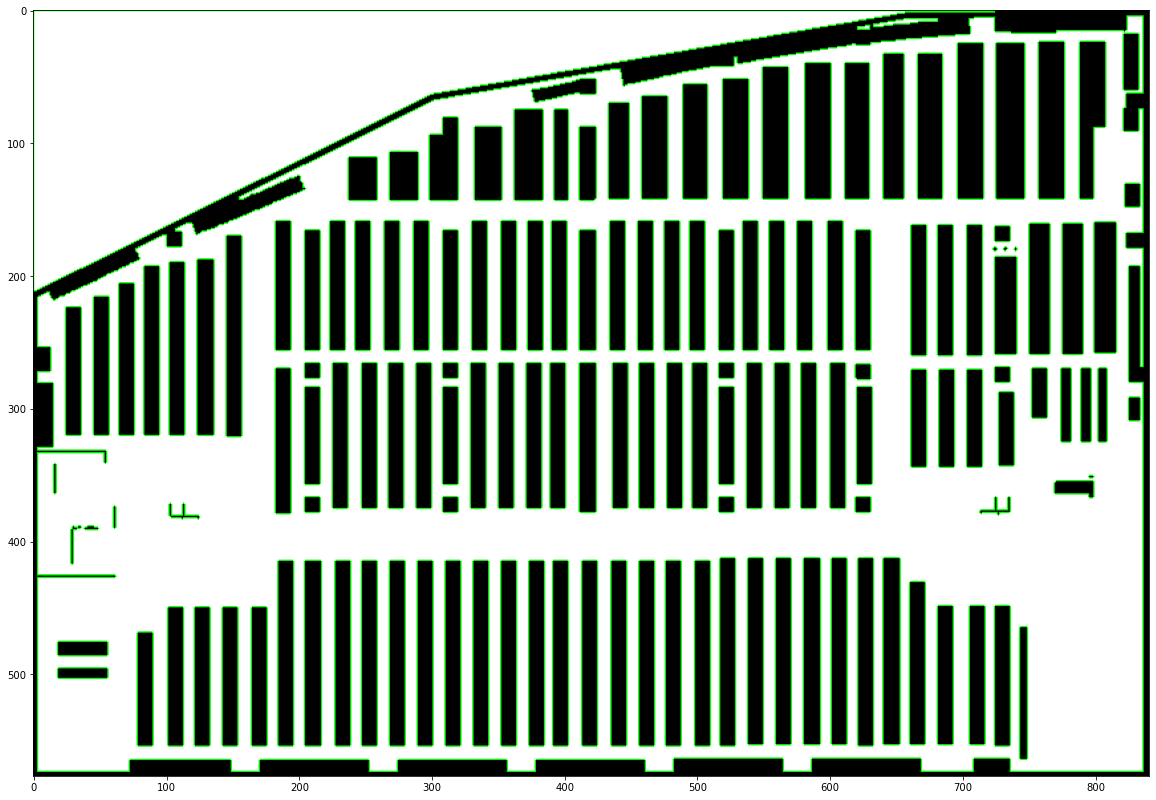

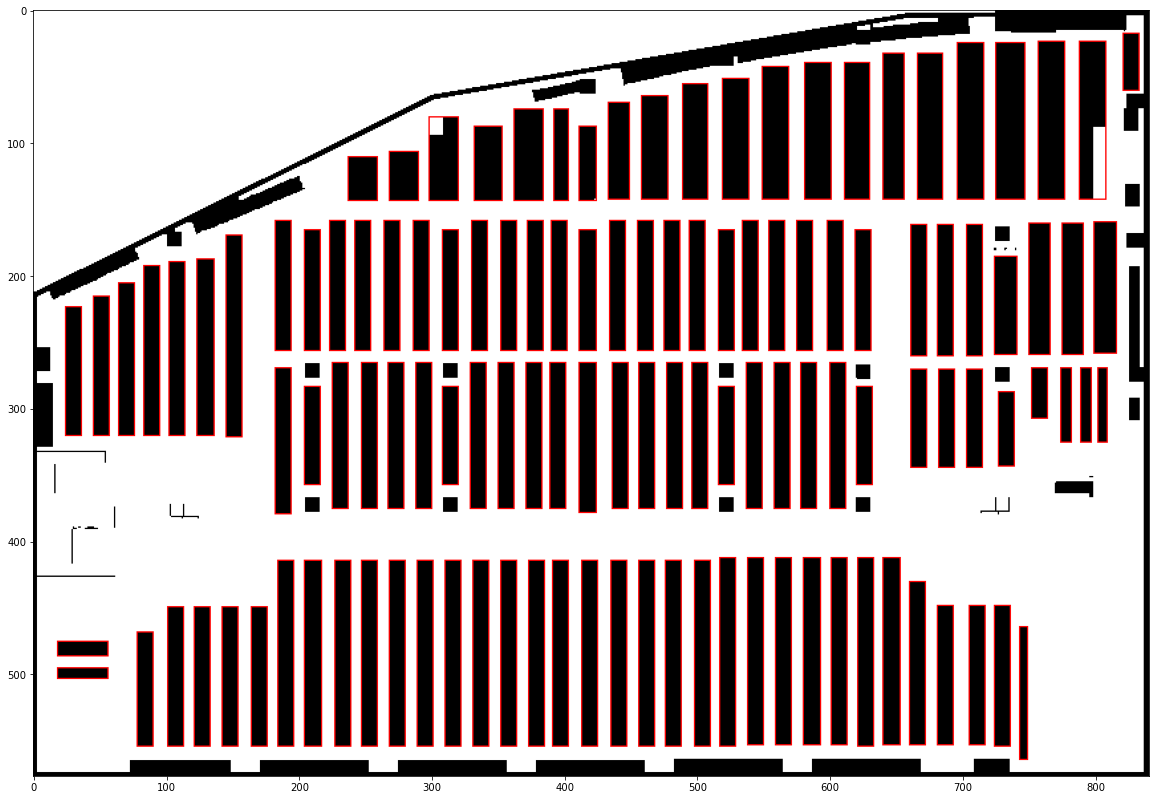

In [60]:
doit2()


In [ ]:
cv2.drawContours(image, contours,111, (0, 255, 0), 1)

In [61]:
contList

[[18, 495, 56, 503],
 [18, 475, 56, 486],
 [78, 468, 90, 554],
 [743, 464, 749, 564],
 [164, 449, 176, 554],
 [142, 449, 154, 554],
 [121, 449, 133, 554],
 [101, 449, 113, 554],
 [724, 448, 736, 554],
 [705, 448, 717, 553],
 [681, 448, 693, 553],
 [660, 430, 672, 553],
 [498, 414, 510, 554],
 [476, 414, 488, 554],
 [456, 414, 468, 554],
 [435, 414, 447, 554],
 [413, 414, 425, 554],
 [391, 414, 403, 554],
 [373, 414, 385, 554],
 [352, 414, 364, 554],
 [331, 414, 343, 554],
 [310, 414, 322, 554],
 [289, 414, 301, 554],
 [268, 414, 280, 554],
 [247, 414, 259, 554],
 [227, 414, 239, 554],
 [204, 414, 217, 554],
 [184, 414, 196, 554],
 [640, 412, 653, 553],
 [621, 412, 633, 554],
 [601, 412, 613, 553],
 [580, 412, 593, 553],
 [559, 412, 571, 553],
 [538, 412, 550, 553],
 [517, 412, 529, 554],
 [727, 287, 739, 343],
 [620, 283, 632, 357],
 [516, 283, 528, 357],
 [308, 283, 320, 357],
 [204, 283, 216, 357],
 [703, 270, 715, 344],
 [682, 270, 694, 344],
 [661, 270, 673, 344],
 [802, 269, 809, 

In [62]:
len(contList)

122

In [ ]:
image = cv2.imread('hand_edit.png', cv2.IMREAD_COLOR)
    

In [ ]:
cv2.imshow('How',image)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
kernel = np.ones((3,3),np.uint8)

In [ ]:
erosion = cv2.erode(image, kernel,iterations=1)

In [ ]:
cv2.imshow('Erosion',erosion)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
dil = cv2.dilate(erosion, kernel,iterations=1)

In [ ]:
cv2.imshow('Erosion',dil)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
dil2 = cv2.dilate(dil, kernel,iterations=1)

In [ ]:
ero2 = cv2.erode(dil2, kernel,iterations=1)

In [ ]:
cv2.imshow('Erosion',ero2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
opening = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

In [ ]:
cv2.imshow('Erosion',opening)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cv2.imwrite("out.png",opening)